In [14]:
!pip install -U tabletext prettytable 

Requirement already up-to-date: tabletext in /root/anaconda3/envs/py37/lib/python3.7/site-packages (0.1)
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=dd61545d0bbade4f9541aaaf1eee148c3cf84f45e8eeac2c4adce839ca6e59a7
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


In [2]:
import pandas as pd
from os import path
import yfinance as yf
from prettytable import PrettyTable
from glob import glob
import matplotlib.pyplot as plt

In [4]:
def generate_ascii_table(df):
    x = PrettyTable()
    x.field_names = df.columns.tolist()
    for row in df.values:
        x.add_row(row)
    print(x)
    return x

In [23]:
file_name = 'data/nyse.csv'

stocks_df = pd.read_csv(file_name)

print("Head:")
generate_ascii_table(stocks_df.head())

print("Tail:")
generate_ascii_table(stocks_df.tail())

print("Shape:", stocks_df.shape)

Head:
+--------+------------------------------------------------------------------------------------------+
| Symbol |                                       Description                                        |
+--------+------------------------------------------------------------------------------------------+
|   A    |                         Agilent Technologies, Inc. Common Stock                          |
|   AA   |                                 Alcoa Inc. Common Stock                                  |
|  AA$B  | Alcoa Inc. Depository Shares Representing 1/10th Preferred Convertilble Class B Series 1 |
|  AAC   |                             AAC Holdings, Inc. Common Stock                              |
|  AAN   |                                Aaron's, Inc. Common Stock                                |
+--------+------------------------------------------------------------------------------------------+
Tail:
+--------+------------------------------------------------------------

In [26]:
# with volume
stock_df_vol = pd.read_csv("data/nyse-volume.csv").dropna()

print("Head:")
generate_ascii_table(stock_df_vol.head())

print("Tail:")
generate_ascii_table(stock_df_vol.tail())

print("Shape:", stock_df_vol.shape)


Head:
+--------+---------------------------------------------------+-------------+
| Symbol |                    Description                    | Last Volume |
+--------+---------------------------------------------------+-------------+
|   A    |      Agilent Technologies, Inc. Common Stock      |  1712146.0  |
|   AA   |              Alcoa Inc. Common Stock              |  4695503.0  |
|  AAP   | Advance Auto Parts Inc Advance Auto Parts Inc W/I |  1065904.0  |
|  AAT   |      American Assets Trust, Inc. Common Stock     |   275667.0  |
|  ABB   |                ABB Ltd Common Stock               |  1777283.0  |
+--------+---------------------------------------------------+-------------+
Tail:
+--------+------------------------------------------+-------------+
| Symbol |               Description                | Last Volume |
+--------+------------------------------------------+-------------+
|  WGO   | Winnebago Industries, Inc. Common Stock  |   635929.0  |
|  WHG   | Westwood Hol

In [27]:
stock_df_vol = stock_df_vol[stock_df_vol['Last Volume'] >= 1000000]

print("Head:")
generate_ascii_table(stock_df_vol.head())

print("Tail:")
generate_ascii_table(stock_df_vol.tail())

print("Shape:", stock_df_vol.shape)


Head:
+--------+---------------------------------------------------+-------------+
| Symbol |                    Description                    | Last Volume |
+--------+---------------------------------------------------+-------------+
|   A    |      Agilent Technologies, Inc. Common Stock      |  1712146.0  |
|   AA   |              Alcoa Inc. Common Stock              |  4695503.0  |
|  AAP   | Advance Auto Parts Inc Advance Auto Parts Inc W/I |  1065904.0  |
|  ABB   |                ABB Ltd Common Stock               |  1777283.0  |
|  ABBV  |              AbbVie Inc. Common Stock             |  8004485.0  |
+--------+---------------------------------------------------+-------------+
Tail:
+--------+--------------------------------------------------------------+-------------+
| Symbol |                         Description                          | Last Volume |
+--------+--------------------------------------------------------------+-------------+
|   W    |              Wayfair

In [41]:
tickers = list(
    map(
        lambda x: x.replace('./data/', '').replace('.pkl', ''), glob("./data/*.pkl")
    )
)

for ticker in tickers:
    df = pd.read_csv('./data/' + ticker + ".csv")
    if (df[df.isna()].dropna().shape[0] > 0):
        print('Ticker ', ticker, ' has NA data')


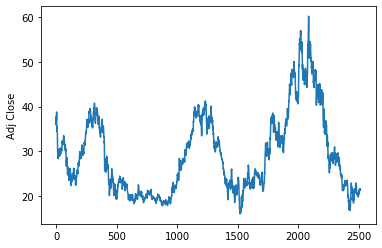

In [64]:
ticker = "AA"
df = pd.read_csv("./data/" + ticker + ".csv")
plt.plot(df["Adj Close"])
plt.ylabel("Adj Close")
plt.show()

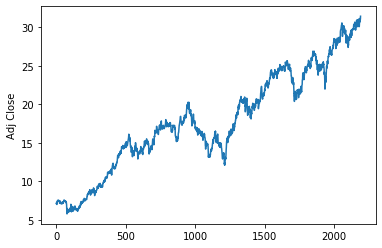

In [65]:
ticker = "STAG"
df = pd.read_csv("./data/" + ticker + ".csv")
plt.plot(df["Adj Close"])
plt.ylabel("Adj Close")
plt.show()

In [74]:
accuracy_df = pd.read_csv("./data/accuracy.csv").drop(columns=["benchmark_test_accuracy", "benchmark_train_accuracy"])
accuracy_df = accuracy_df[accuracy_df['train_accuracy'] > .95]
generate_ascii_table(accuracy_df)
print("Shape:", accuracy_df.shape)

+--------+--------------------+--------------------+
| ticker |   test_accuracy    |   train_accuracy   |
+--------+--------------------+--------------------+
|  AEG   | 0.9945945945945946 | 0.9974811083123426 |
|  VVR   |        1.0         |        1.0         |
|  BSX   | 0.9607843137254902 | 0.9730941704035876 |
|  DRH   | 0.9792207792207792 | 0.9816625916870416 |
|  FSM   | 0.9729166666666668 | 0.9866071428571428 |
|  GGB   | 0.9869621903520208 | 0.9851325145442792 |
|  IVR   | 0.9917695473251028 | 0.9884615384615384 |
|  LYG   | 0.9662337662337662 | 0.9533742331288344 |
|  MBT   | 0.9521739130434784 | 0.9640591966173362 |
|  SNH   | 0.9760191846522782 | 0.9579326923076924 |
+--------+--------------------+--------------------+
Shape: (10, 3)


In [6]:
accuracy_df = pd.read_csv("./data/accuracy.csv")
accuracy_df = accuracy_df[accuracy_df['train_accuracy'] > .7]

print("Head:")
generate_ascii_table(accuracy_df.head())

print("Tail:")
generate_ascii_table(accuracy_df.tail())

print("Shape:", accuracy_df.shape)


Head:
+--------+--------------------+-------------------------+--------------------+--------------------------+
| ticker |   test_accuracy    | benchmark_test_accuracy |   train_accuracy   | benchmark_train_accuracy |
+--------+--------------------+-------------------------+--------------------+--------------------------+
|  ABEV  | 0.8151515151515152 |    0.4272727272727273   | 0.7828746177370031 |    0.4189602446483181    |
|  AEG   | 0.9945945945945946 |    0.4594594594594595   | 0.9974811083123426 |    0.4508816120906801    |
|  AMC   | 0.7333333333333333 |    0.3586206896551724   | 0.7443181818181818 |    0.3522727272727273    |
|  ALSN  | 0.6890595009596929 |    0.3570057581573896   | 0.7204502814258912 |    0.3696060037523452    |
|  AMX   | 0.8870588235294118 |    0.3694117647058823   |  0.87115165336374  |    0.3899657924743444    |
+--------+--------------------+-------------------------+--------------------+--------------------------+
Tail:
+--------+--------------------+---